In [19]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [8]:
from proj1_helpers import *
from UtilityFunctions import *
from datapreprocessing import *
from implementations import *
from patternsmissingvalues import *

In [9]:
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

## Exploring the data

In [10]:
y.shape,tX.shape,ids.shape


((250000,), (250000, 30), (250000,))

In [11]:
tX[0]

array([ 1.38470e+02,  5.16550e+01,  9.78270e+01,  2.79800e+01,
        9.10000e-01,  1.24711e+02,  2.66600e+00,  3.06400e+00,
        4.19280e+01,  1.97760e+02,  1.58200e+00,  1.39600e+00,
        2.00000e-01,  3.26380e+01,  1.01700e+00,  3.81000e-01,
        5.16260e+01,  2.27300e+00, -2.41400e+00,  1.68240e+01,
       -2.77000e-01,  2.58733e+02,  2.00000e+00,  6.74350e+01,
        2.15000e+00,  4.44000e-01,  4.60620e+01,  1.24000e+00,
       -2.47500e+00,  1.13497e+02])

In [12]:
(tX[:,0].shape,np.std(tX[:,0]))

((250000,), 406.34483401069514)

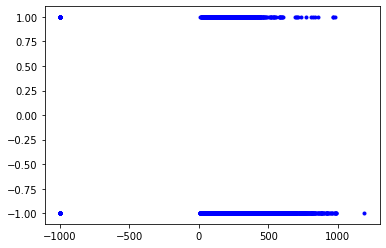

In [13]:
plt.scatter(tX[:,0],y, marker=".", color='b')

### Correlation Matrix:

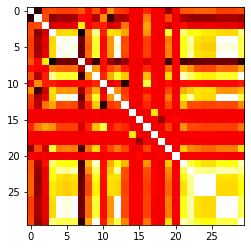

In [10]:
#corrcoef prod des vals normalisées à partir de la mat de correlation
cov = np.cov(tX.T)
#print(cov.shape, np.max(cov))
corr = np.corrcoef(tX.T)
#print(corr.shape, (corr))
plt.imshow(corr, cmap='hot')
#test

### PCA:

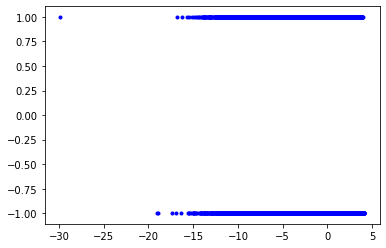

In [14]:
X_pca = pca(tX)
plt.scatter(X_pca[:,0],y, marker=".", color='b')

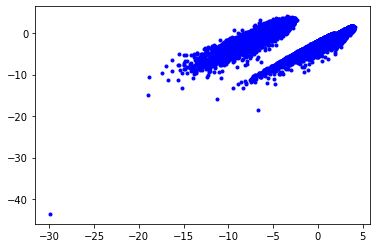

In [15]:
plt.scatter(X_pca[:,0],X_pca[:,1], marker=".", color='b')

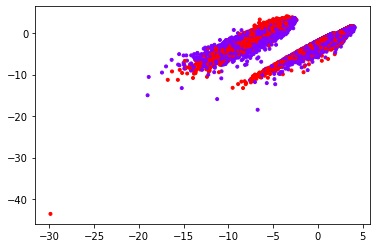

In [17]:
import matplotlib.cm as cm # To colour dots of scatter plot
colors = cm.rainbow(y)
plt.scatter(X_pca[:,0],X_pca[:,1], marker=".", color=colors)

## Missing values positions :

In [11]:
tX2 = tX.copy()
res = []
for el in tX2.T:
    res.append(el[el > -999])
print(np.array(res).shape)

mu = [np.mean(el) for el in res]
sigma = [np.std(el) for el in res]

for col, mu1, sigma1 in zip(tX2.T,mu,sigma):
    col[col == -999] = np.random.normal(mu1, sigma1, np.sum([col == -999][0]))
    
print(np.sum(tX==-999), np.sum(tX2==-999))

(30,)
1580052 0


(250000, 30)
(250000, 30)
(250000,) (150087, 23)
(250000,) (150087, 23)
[False False False False  True  True  True False False False False False
  True False False False False False False False False False False False
 False False  True  True  True False]


(array([1720., 1658., 1705., 1662., 1847., 1904., 1892., 1803., 1686.,
        1659., 1594., 1459., 1467., 1409., 1324., 1315., 1313., 1268.,
        1133., 1159., 1089., 1041., 1118., 1144., 1165., 1158., 1079.,
        1082., 1043., 1026., 1017., 1017., 1003.,  987.,  969.,  923.,
         920.,  924.,  970.,  899.,  832.,  912.,  812.,  801.,  817.,
         874.,  792.,  846.,  812.,  754.,  782.,  756.,  711.,  675.,
         661.,  636.,  603.,  607.,  547.,  582.,  517.,  481.,  485.,
         425.,  344.,  388.,  350.,  350.,  296.,  277.,  248.,  234.,
         222.,  175.,  176.,  171.,  124.,  138.,  132.,   90.,   91.,
          82.,   56.,   61.,   46.,   52.,   31.,   25.,   29.,   22.,
          14.,   10.,   11.,   11.,    4.,    2.,    3.,    5.,    0.,
           2.]),
 array([0.     , 0.08503, 0.17006, 0.25509, 0.34012, 0.42515, 0.51018,
        0.59521, 0.68024, 0.76527, 0.8503 , 0.93533, 1.02036, 1.10539,
        1.19042, 1.27545, 1.36048, 1.44551, 1.53054, 1.61557

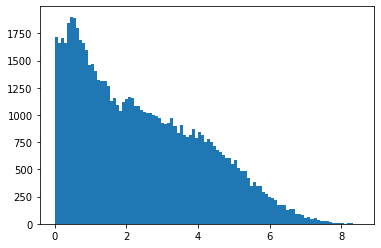

In [12]:
# quest-ce qu'il ya exactement dans graphe ?

missing_val = np.zeros(tX.shape)
print(missing_val.shape)
missing_val[tX==-999] = 1
total_cols = np.sum(missing_val, axis=0)/y.shape
total_rows = np.sum(missing_val, axis=1)/np.shape(tX)[1]
print(missing_val.shape)
tX_reduced = tX[: ,total_cols < 0.5] #select only cols where less than 50% val missing and < 30% for rows
tX_reduced = tX_reduced[total_rows<0.3, :] #and < 30% for rows
y_reduced = y[total_rows<0.3]
print(np.shape(total_rows), tX_reduced.shape)
print(np.shape(total_rows>0.3), tX_reduced.shape)
print(total_cols >0.5)

tXcol = [el for el in tX[:,4] if el > -999]
#plt.hist(tX[:,4])
plt.hist(tXcol, bins=100)

## Data preprocessing (global) :

## comment faire pour revenir en arrière pour faire le data preprocessing ensuite pour chaque pattern ?

In [20]:
x, mean_x, std_x = standardize(tX)
tX = adding_offset(x)

NameError: name 'np' is not defined

## Least squares gradient descent :

In [20]:
initial_w = np.zeros(np.shape(tX2)[1])
gamma = 0.0815
max_iters = 1000
final_w, final_loss = least_squares_GD(y, tX2, w1, max_iters, gamma)

Gradient Descent(0/999): loss=0.3573330015768276, w0=-0.0002798061479453727, w1=-0.008178664855235555
Gradient Descent(30/999): loss=4.9482646310504405e+243, w0=-8.135150038982155e+122, w1=-3.1181701565343077e+122
Gradient Descent(60/999): loss=inf, w0=-2.9699996794839654e+257, w1=-1.1383888829470408e+257
Gradient Descent(90/999): loss=nan, w0=nan, w1=nan
Gradient Descent(120/999): loss=nan, w0=nan, w1=nan
Gradient Descent(150/999): loss=nan, w0=nan, w1=nan
Gradient Descent(180/999): loss=nan, w0=nan, w1=nan
Gradient Descent(210/999): loss=nan, w0=nan, w1=nan
Gradient Descent(240/999): loss=nan, w0=nan, w1=nan
Gradient Descent(270/999): loss=nan, w0=nan, w1=nan
Gradient Descent(300/999): loss=nan, w0=nan, w1=nan
Gradient Descent(330/999): loss=nan, w0=nan, w1=nan
Gradient Descent(360/999): loss=nan, w0=nan, w1=nan
Gradient Descent(390/999): loss=nan, w0=nan, w1=nan
Gradient Descent(420/999): loss=nan, w0=nan, w1=nan
Gradient Descent(450/999): loss=nan, w0=nan, w1=nan
Gradient Descent(4

## Least squares stochastic gradient descent :

In [17]:

gamma = 0.005
final_w_sgd, final_loss = least_squares_SGD(y, tX2, initial_w, max_iters, gamma)
print(final_loss, final_w)

Gradient Descent(0/999): loss=865907.6352200226, w0=-0.427935, w1=-0.15632
Gradient Descent(10/999): loss=1.4616456522190779e+65, w0=2.628843140599987e+29, w1=1.651630567976175e+29
Gradient Descent(20/999): loss=2.1067450756653428e+126, w0=2.603404278159179e+60, w1=1.6077947901046667e+60
Gradient Descent(30/999): loss=1.9077055358565181e+180, w0=-2.3372700760589257e+87, w1=-9.83778642794131e+86
Gradient Descent(40/999): loss=1.972000634367493e+233, w0=-2.7907018583850882e+113, w1=-1.5156372627867183e+113
Gradient Descent(50/999): loss=7.660622590539153e+295, w0=-3.295059541193246e+144, w1=-3.6698785082302098e+143
Gradient Descent(60/999): loss=inf, w0=6.784543449182488e+171, w1=1.2928017998166602e+171
Gradient Descent(70/999): loss=inf, w0=8.030302211228767e+200, w1=1.9528051292718482e+200
Gradient Descent(80/999): loss=inf, w0=1.5376326218319444e+232, w1=6.028694818394667e+231
Gradient Descent(90/999): loss=inf, w0=2.146647498458633e+262, w1=1.0070137919203605e+262
Gradient Descent(10

KeyboardInterrupt: 

## Least squares with normal equation 

In [21]:
# performs worse
w1,loss1= least_squares(y, tX2)
print(loss1, w1)

NameError: name 'tX2' is not defined

## Generate predictions and save ouput in csv format for submission:

In [27]:
DATA_TEST_PATH = '../data/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [28]:
OUTPUT_PATH = '../data/predicted.csv' # TODO: fill in desired name of output file for submission
tX_test, mean_x, std_x = standardize(tX_test)
tX_test  = np.c_[np.ones(tX_test.shape[0]), tX_test]
y_pred = predict_labels(w1, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

In [ ]:
#implementer 10% du train set comme test set